In [1]:
import pandas as pd, numpy as np, matplotlib as mtl, matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [4]:
def normalization(dataset):
    X=pd.DataFrame(dataset).drop(0,axis=1)
    X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
    return np.c_[np.ones((10,1)),X]

In [5]:
def matrix(iterations,weights):
    weight_matrix=pd.DataFrame(np.array(weights),columns=['w0','w1','w2','w3'])
    weight_matrix_with_iter=pd.concat([pd.DataFrame(iterations,columns=['iterations']),weight_matrix],axis=1)
    return weight_matrix_with_iter

In [6]:
def draw(dat):
    fig,ax=plt.subplots(nrows=1,ncols=3)
    fig.set_size_inches(18,6)
    ax1,ax2,ax3=ax
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w0'])
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w1'])
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w2'])
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w3'])
    ax1.legend(['w0','w1','w2','w3'])
    ax1.set_title(f'lambda:{dat[0][1]}')
    
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w0'])
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w1'])
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w2'])
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w3'])
    ax2.legend(['w0','w1','w2','w3'])
    ax2.set_title(f'lambda:{dat[1][1]}')
    
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w0'])
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w1'])
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w2'])
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w3'])
    ax3.legend(['w0','w1','w2','w3'])
    ax3.set_title(f'lambda:{dat[2][1]}')
    plt.show()

------------lambda:0.2------------
итерация:0, веса:[2.10016774 0.88879419 0.73588574 0.86678548],скорость обучения:0.00909090909090909,MSE:3188.926794484911
итерация:10, веса:[10.7046535   3.91529962  4.11760854  4.48716514],скорость обучения:0.008264462809917354,MSE:1914.4493375726502
итерация:20, веса:[16.72014944  6.01069381  6.44212869  6.97430587],скорость обучения:0.007513148009015776,MSE:1223.2119793841389
итерация:30, веса:[21.03296816  7.49701177  8.0772359   8.72280422],скорость обучения:0.006830134553650705,MSE:827.7080328857737
итерация:40, веса:[24.19647129  8.5747253   9.25158929  9.97789966],скорость обучения:0.006209213230591549,MSE:590.1676026002066
итерация:50, веса:[26.5654279   9.37191831 10.11104569 10.89596419],скорость обучения:0.005644739300537772,MSE:441.1079402235635
итерация:60, веса:[28.37291374  9.97240471 10.750859   11.57907512],скорость обучения:0.005131581182307065,MSE:343.80480144753164
итерация:70, веса:[29.77554921 10.43224992 11.23459349 12.0953187

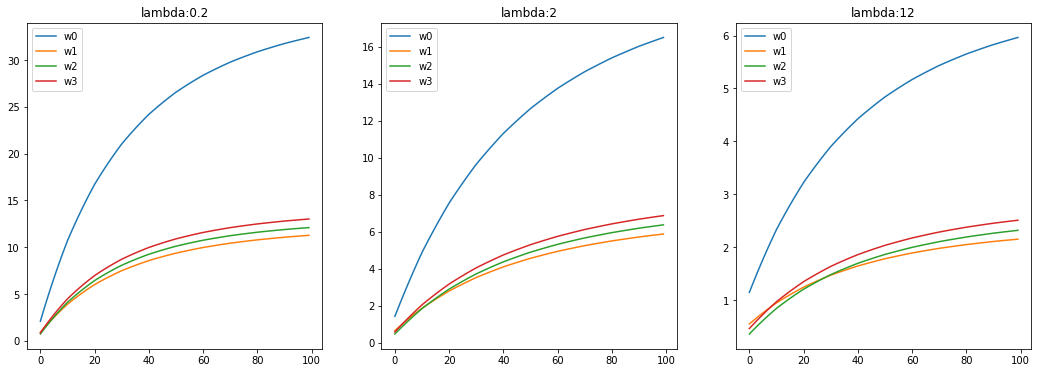

In [7]:
step=1e-2
n=100
X_norm=normalization(X)
lambda_list=[0.2,2,12]
dict_={}
for lambda_ in lambda_list:
    print(f'------------lambda:{lambda_}------------')
    iter_list=[]
    weights_list=[]
    W=np.array([1,0.5,0.3,0.4]).reshape(-1,1)
    for i in range(n):
        y_predicted=X_norm@W
        MSE=np.mean((y_predicted-np.array(y).reshape(-1,1))**2)
        gradient=2/X_norm.shape[0]*X_norm.T@(X_norm@W-np.array(y).reshape(-1,1))+lambda_*W
        W-=step*gradient

        iter_list.append(i)
        weights_list.append(W.T.flatten())

        if i%10==0:
            step/=1.1
            np.round
            print(f'итерация:{i}, веса:{W.T.flatten()},скорость обучения:{step},MSE:{MSE}')
        
    data_to_draw=matrix(iter_list,weights_list)
    
    dict_[lambda_list.index(lambda_)]=[data_to_draw,lambda_]

draw(dict_)

In [8]:
#С увеличением lambda происходит снижение значений весов

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [9]:
def matrix(iterations,weights):
    weight_matrix=pd.DataFrame(np.array(weights),columns=['w0','w1','w2','w3'])
    weight_matrix_with_iter=pd.concat([pd.DataFrame(iterations,columns=['iterations']),weight_matrix],axis=1)
    return weight_matrix_with_iter

In [10]:
def draw(dat):
    fig,ax=plt.subplots(nrows=1,ncols=3)
    fig.set_size_inches(18,6)
    ax1,ax2,ax3=ax
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w0'])
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w1'])
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w2'])
    ax1.plot(dat[0][0]['iterations'],dat[0][0]['w3'])
    ax1.legend(['w0','w1','w2','w3'])
    ax1.set_title(f'lambda:{dat[0][1]}')
    
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w0'])
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w1'])
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w2'])
    ax2.plot(dat[1][0]['iterations'],dat[1][0]['w3'])
    ax2.legend(['w0','w1','w2','w3'])
    ax2.set_title(f'lambda:{dat[1][1]}')
    
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w0'])
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w1'])
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w2'])
    ax3.plot(dat[2][0]['iterations'],dat[2][0]['w3'])
    ax3.legend(['w0','w1','w2','w3'])
    ax3.set_title(f'lambda:{dat[2][1]}')
    plt.show()

------------lambda:0.2------------
итерация:0, веса:[2.10016774 0.88779419 0.73448574 0.86558548],скорость обучения:0.00909090909090909,MSE:3188.926794484911
итерация:10, веса:[10.79260462  3.93632275  4.13826828  4.51233303],скорость обучения:0.008264462809917354,MSE:1906.436736527899
итерация:20, веса:[16.98118604  6.08424963  6.51877869  7.06193336],скорость обучения:0.007513148009015776,MSE:1201.1997774049055
итерация:30, веса:[21.49210051  7.63205541  8.2194639   8.88291697],скорость обучения:0.006830134553650705,MSE:794.7955902456531
итерация:40, веса:[24.85105804  8.77040597  9.45801651 10.20880113],скорость обучения:0.006209213230591549,MSE:550.4273688320784
итерация:50, веса:[27.4010373   9.62328159 10.37579378 11.19116508],скорость обучения:0.005644739300537772,MSE:397.70815779199745
итерация:60, веса:[29.37102326 10.27313494 11.06664034 11.93060114],скорость обучения:0.005131581182307065,MSE:298.8613550214705
итерация:70, веса:[30.91719057 10.77594967 11.59413705 12.49523411

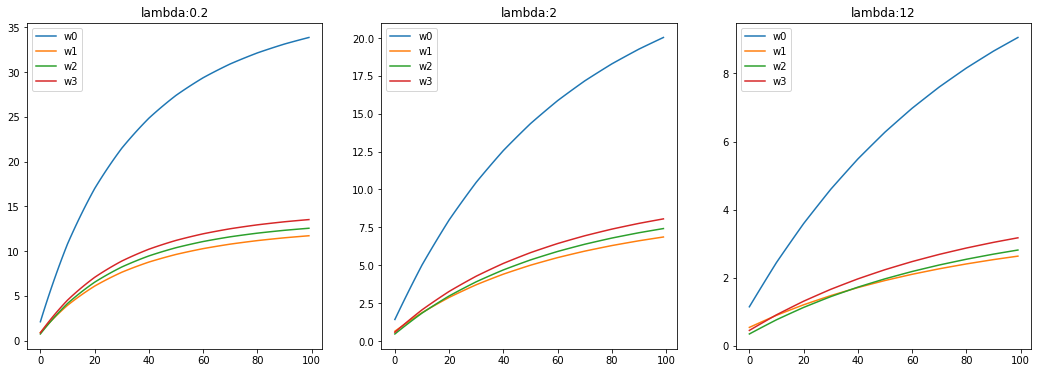

In [11]:
step=1e-2
n=100
X_norm=normalization(X)
lambda_list=[0.2,2,12]
dict_={}
for lambda_ in lambda_list:
    print(f'------------lambda:{lambda_}------------')
    iter_list=[]
    weights_list=[]
    W=np.array([1,0.5,0.3,0.4]).reshape(-1,1)
    for i in range(n):
        y_predicted=X_norm@W
        MSE=np.mean((y_predicted-np.array(y).reshape(-1,1))**2)
        gradient=2/X_norm.shape[0]*X_norm.T@(X_norm@W-np.array(y).reshape(-1,1))+lambda_*np.sign(W)
        W-=step*gradient

        iter_list.append(i)
        weights_list.append(W.T.flatten())

        if i%10==0:
            step/=1.1
            np.round
            print(f'итерация:{i}, веса:{W.T.flatten()},скорость обучения:{step},MSE:{MSE}')
        
    data_to_draw=matrix(iter_list,weights_list)
    
    dict_[lambda_list.index(lambda_)]=[data_to_draw,lambda_]

draw(dict_)

In [12]:
#l1 аналогично l2 борется с ростом весов, однако, происходит это более умеренными темпами

4.*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [13]:
from sklearn import datasets

In [42]:
some_dataset,target_values=datasets.make_regression(n_samples=100000,n_features=30)

In [43]:
def standartization(X):
    X=(X-X.mean(axis=0))/X.std(axis=0)
    return np.c_[np.ones((X.shape[0],1)),X]

In [44]:
some_dataset_updated=standartization(some_dataset)

In [45]:
w_gd=np.random.randn(some_dataset_updated.shape[1],1).copy()

In [46]:
w_sgd=w_gd.copy()

In [47]:
w_gd.shape

(31, 1)

In [48]:
w_gd

array([[-0.2429113 ],
       [ 0.51082664],
       [ 0.2760794 ],
       [ 0.92926929],
       [ 0.55389514],
       [-1.33589841],
       [ 0.25171189],
       [ 0.9694091 ],
       [ 0.77072402],
       [ 1.14270962],
       [-1.83459289],
       [-0.4762132 ],
       [-0.61455204],
       [ 0.31226606],
       [ 0.05672009],
       [-0.84395988],
       [ 0.23229528],
       [-0.98299075],
       [ 0.33081147],
       [-1.59328653],
       [ 1.22173429],
       [ 1.08723545],
       [-0.29261616],
       [ 0.16218812],
       [ 0.61034422],
       [ 1.31407183],
       [-0.13252727],
       [ 1.15108203],
       [-0.63433962],
       [ 0.80843526],
       [ 0.58623353]])

In [49]:
step=1e-2
n=1000
W=w_gd
X_stand=some_dataset_updated
y=target_values.reshape(-1,1)
gd_iter_list=[]
gd_MSE_list=[]


for i in range(n):
    y_predicted=X_stand@W
    MSE=np.mean((y_predicted-y)**2)
    gradient=2/X_stand.shape[0]*X_stand.T@(y_predicted-y)
    W-=step*gradient
    
    gd_iter_list.append(i)
    gd_MSE_list.append(MSE)

    if i%10==0:
        step/=1.1
        print(f'итерация:{i},MSE:{MSE}')
    
    
    


итерация:0,MSE:27604.236896885763
итерация:10,MSE:19053.270350568077
итерация:20,MSE:13606.268212373292
итерация:30,MSE:10021.128646613497
итерация:40,MSE:7590.37755154331
итерация:50,MSE:5897.3436730585945
итерация:60,MSE:4688.975684169852
итерация:70,MSE:3807.194791918743
итерация:80,MSE:3150.6542698465164
итерация:90,MSE:2652.8067506682487
итерация:100,MSE:2268.9803578370884
итерация:110,MSE:1968.5701502962236
итерация:120,MSE:1730.2092046496143
итерация:130,MSE:1538.7170572863442
итерация:140,MSE:1383.132092616189
итерация:150,MSE:1255.418800662278
итерация:160,MSE:1149.6034102295826
итерация:170,MSE:1061.1863975469503
итерация:180,MSE:986.7370088732858
итерация:190,MSE:923.6093542773631
итерация:200,MSE:869.7409234367016
итерация:210,MSE:823.5077718164885
итерация:220,MSE:783.619190030763
итерация:230,MSE:749.0402267781751
итерация:240,MSE:718.9340936101543
итерация:250,MSE:692.6189197888392
итерация:260,MSE:669.5349738952306
итерация:270,MSE:649.219595945101
итерация:280,MSE:631.

In [211]:
#Stochastic Gradient Descent

In [50]:
w_sgd

array([[-0.2429113 ],
       [ 0.51082664],
       [ 0.2760794 ],
       [ 0.92926929],
       [ 0.55389514],
       [-1.33589841],
       [ 0.25171189],
       [ 0.9694091 ],
       [ 0.77072402],
       [ 1.14270962],
       [-1.83459289],
       [-0.4762132 ],
       [-0.61455204],
       [ 0.31226606],
       [ 0.05672009],
       [-0.84395988],
       [ 0.23229528],
       [-0.98299075],
       [ 0.33081147],
       [-1.59328653],
       [ 1.22173429],
       [ 1.08723545],
       [-0.29261616],
       [ 0.16218812],
       [ 0.61034422],
       [ 1.31407183],
       [-0.13252727],
       [ 1.15108203],
       [-0.63433962],
       [ 0.80843526],
       [ 0.58623353]])

In [52]:
step=1e-2
n=100
W=w_sgd
X_stand=some_dataset_updated
y=target_values.reshape(-1,1)
sgd_iter_list=[]
sgd_MSE_list=[]

#Вариант реализации 1
# for i in range(n):
#     el=np.random.randint(X_stand.shape[0])
#     y_predicted=X_stand[el]@W
#     MSE=np.mean((y_predicted-y[el])**2)
#     gradient=2/X_stand.shape[0]*X_stand[el]*(y_predicted-y[el])
#     W-=step*(gradient.reshape(-1,1))

#     sgd_iter_list.append(i)
#     sgd_MSE_list.append(MSE)                 
#     if i%10==0:
#         step/=1.1
#         print(f'итерация:{i},MSE:{MSE}')

#Вариант реализации 2
for i in range(n):
    c_=0
    for el in range(X_stand.shape[0]):
        el=np.random.randint(X_stand.shape[0])
        y_predicted=X_stand[el]@W
        MSE=np.mean((y_predicted-y[el])**2)
        gradient=2/X_stand.shape[0]*X_stand[el]*(y_predicted-y[el])
        W-=step*(gradient.reshape(-1,1))
        c_+=1
        if c_%10000:
            step/=1.005
        
        
    sgd_iter_list.append(i)
    sgd_MSE_list.append(MSE)                 
    if i%10==0:
        step/=1.1
        print(f'итерация:{i},MSE:{MSE}')

итерация:0,MSE:491.5210048470945
итерация:10,MSE:163281.91678042585


KeyboardInterrupt: 

In [216]:
def GD_SGD(**kwargs):
    fig,ax=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(15,8)
    gd,sgd=ax
    gd.plot(kwargs['gd'][0],kwargs['gd'][1])
    sgd.plot(kwargs['sgd'][0],kwargs['sgd'][1])


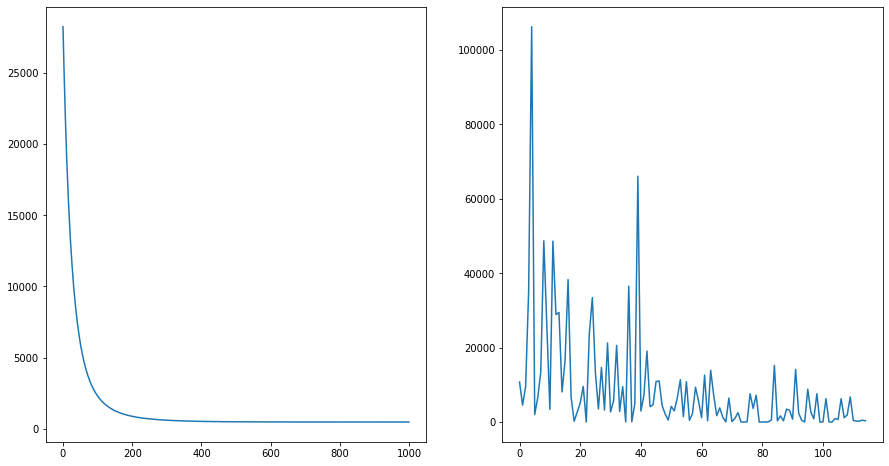

In [217]:
GD_SGD(gd=[gd_iter_list,gd_MSE_list],sgd=[sgd_iter_list,sgd_MSE_list])

In [220]:
#Были проведены замеры скорости сходимости и ошибки данных  для dg и sgd (2 варианта реализации)
#Скорость расчетов для 1000 итераций gd составила около 20 сек, ошибка - начинается более чем от 25тыс. и на последней итерации доходит до 484
#sgd - оказалось все сложенее:
#первый вариант реализации: мгновенные вычисления, но график не дал четкого патерна. Не разобрался почему, код по смыслу не отличается от кода на уроке
#второй вариант реализации: решение только для 100 итераций составило более 7 мин, хоть этот вариант sgd продемонстрировал лучшие показатели по ошибке.
#Таким образом сложно делать выводы по скорости sgd, надеюсь, подскажите, где ошибся. Спасибо

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Это не даст результата, поскольку и тот и другой метод пердставляет собой перевод всех признаков в единую шкалу измерений. Применив сначала один метод, а потом другой мы просто переведем из одной системы измерений в другую не добившись таким образом ценности.